In [180]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

Resources: 
    https://www.kaggle.com/ankandash/pca-k-means-clustering-hierarchical-clustering
        https://www.reneshbedre.com/blog/principal-component-analysis.html

In [255]:
#reading the income & rent data 
income = pd.read_csv("Data files/IncomeandRent2016Analysis.csv")
income.head()

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
0,2000,24207,68607,25828,20465,52595,26186,2608,492,-420,...,22080,1395,197860,14998,14304,35296,8571,44616,88340,1219
1,2006,79,82018,53192,66,84414,69154,20,4368,4148,...,37440,3,41247,37177,57,32740,19577,120,98720,19776
2,2007,4879,47040,31049,4275,47486,33284,519,-1026,-1654,...,18532,320,149251,8214,3099,16119,9233,6952,42250,4267
3,2008,6025,82162,40289,5372,53977,42505,670,61,-906,...,18000,494,30197,7579,4244,36981,10972,8081,55885,9029
4,2009,9763,84475,52414,8179,75281,56378,1679,-2595,-1393,...,23795,673,93747,10851,7373,32797,15451,12889,131020,19841


In [256]:
#Creating a data frame with only the median values
ato = pd.DataFrame(income, columns = ['Postcode','Median taxable income or loss', 'Median salary and wages','Median net rent','Median total income or loss','Median total deductions','Median total business income', 'Median total business expenses', 'Median net tax','Median super total accounts balance'])
ato.head()
ato.shape

(2470, 10)

In [257]:
ato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Postcode                             2470 non-null   int64
 1   Median taxable income or loss        2470 non-null   int64
 2   Median salary and wages              2470 non-null   int64
 3   Median net rent                      2470 non-null   int64
 4   Median total income or loss          2470 non-null   int64
 5   Median total deductions              2470 non-null   int64
 6   Median total business income         2470 non-null   int64
 7   Median total business expenses       2470 non-null   int64
 8   Median net tax                       2470 non-null   int64
 9   Median super total accounts balance  2470 non-null   int64
dtypes: int64(10)
memory usage: 193.1 KB


In [258]:
ato.describe()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
count,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2.470000e+03,2.470000e+03,2470.000000,2470.000000
mean,4097.294332,41958.035223,45817.263563,-1051.731579,44349.316599,646.847773,3.326066e+04,1.990433e+04,10029.780567,44524.489474
std,1496.300821,8858.756984,9270.405387,1808.909304,9213.322116,272.502904,2.814111e+04,2.579349e+04,3436.067296,17166.058391
min,800.000000,13226.000000,11462.000000,-13830.000000,13909.000000,0.000000,8.020000e+02,0.000000e+00,1416.000000,1086.000000
25%,2842.250000,36423.250000,39958.250000,-2063.500000,38354.500000,465.000000,2.619975e+04,1.263000e+04,7702.500000,34867.750000
50%,3873.500000,41052.500000,45080.500000,-944.000000,43381.000000,625.000000,3.040350e+04,1.596900e+04,9314.000000,42957.500000
75%,5165.750000,46514.250000,50501.500000,-22.250000,48881.000000,771.750000,3.622950e+04,2.293050e+04,11645.750000,52384.000000
max,7470.000000,111291.000000,119247.000000,11918.000000,114135.000000,3354.000000,1.284290e+06,1.152908e+06,38232.000000,355380.000000


In [259]:
# Checking the percentage of missing values
round(100*(ato.isnull().sum()/len(ato.index)), 2)

Postcode                               0.0
Median taxable income or loss          0.0
Median salary and wages                0.0
Median net rent                        0.0
Median total income or loss            0.0
Median total deductions                0.0
Median total business income           0.0
Median total business expenses         0.0
Median net tax                         0.0
Median super total accounts balance    0.0
dtype: float64

In [260]:
ato.columns

Index(['Postcode', 'Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance'],
      dtype='object')

<AxesSubplot:xlabel='Median super total accounts balance'>

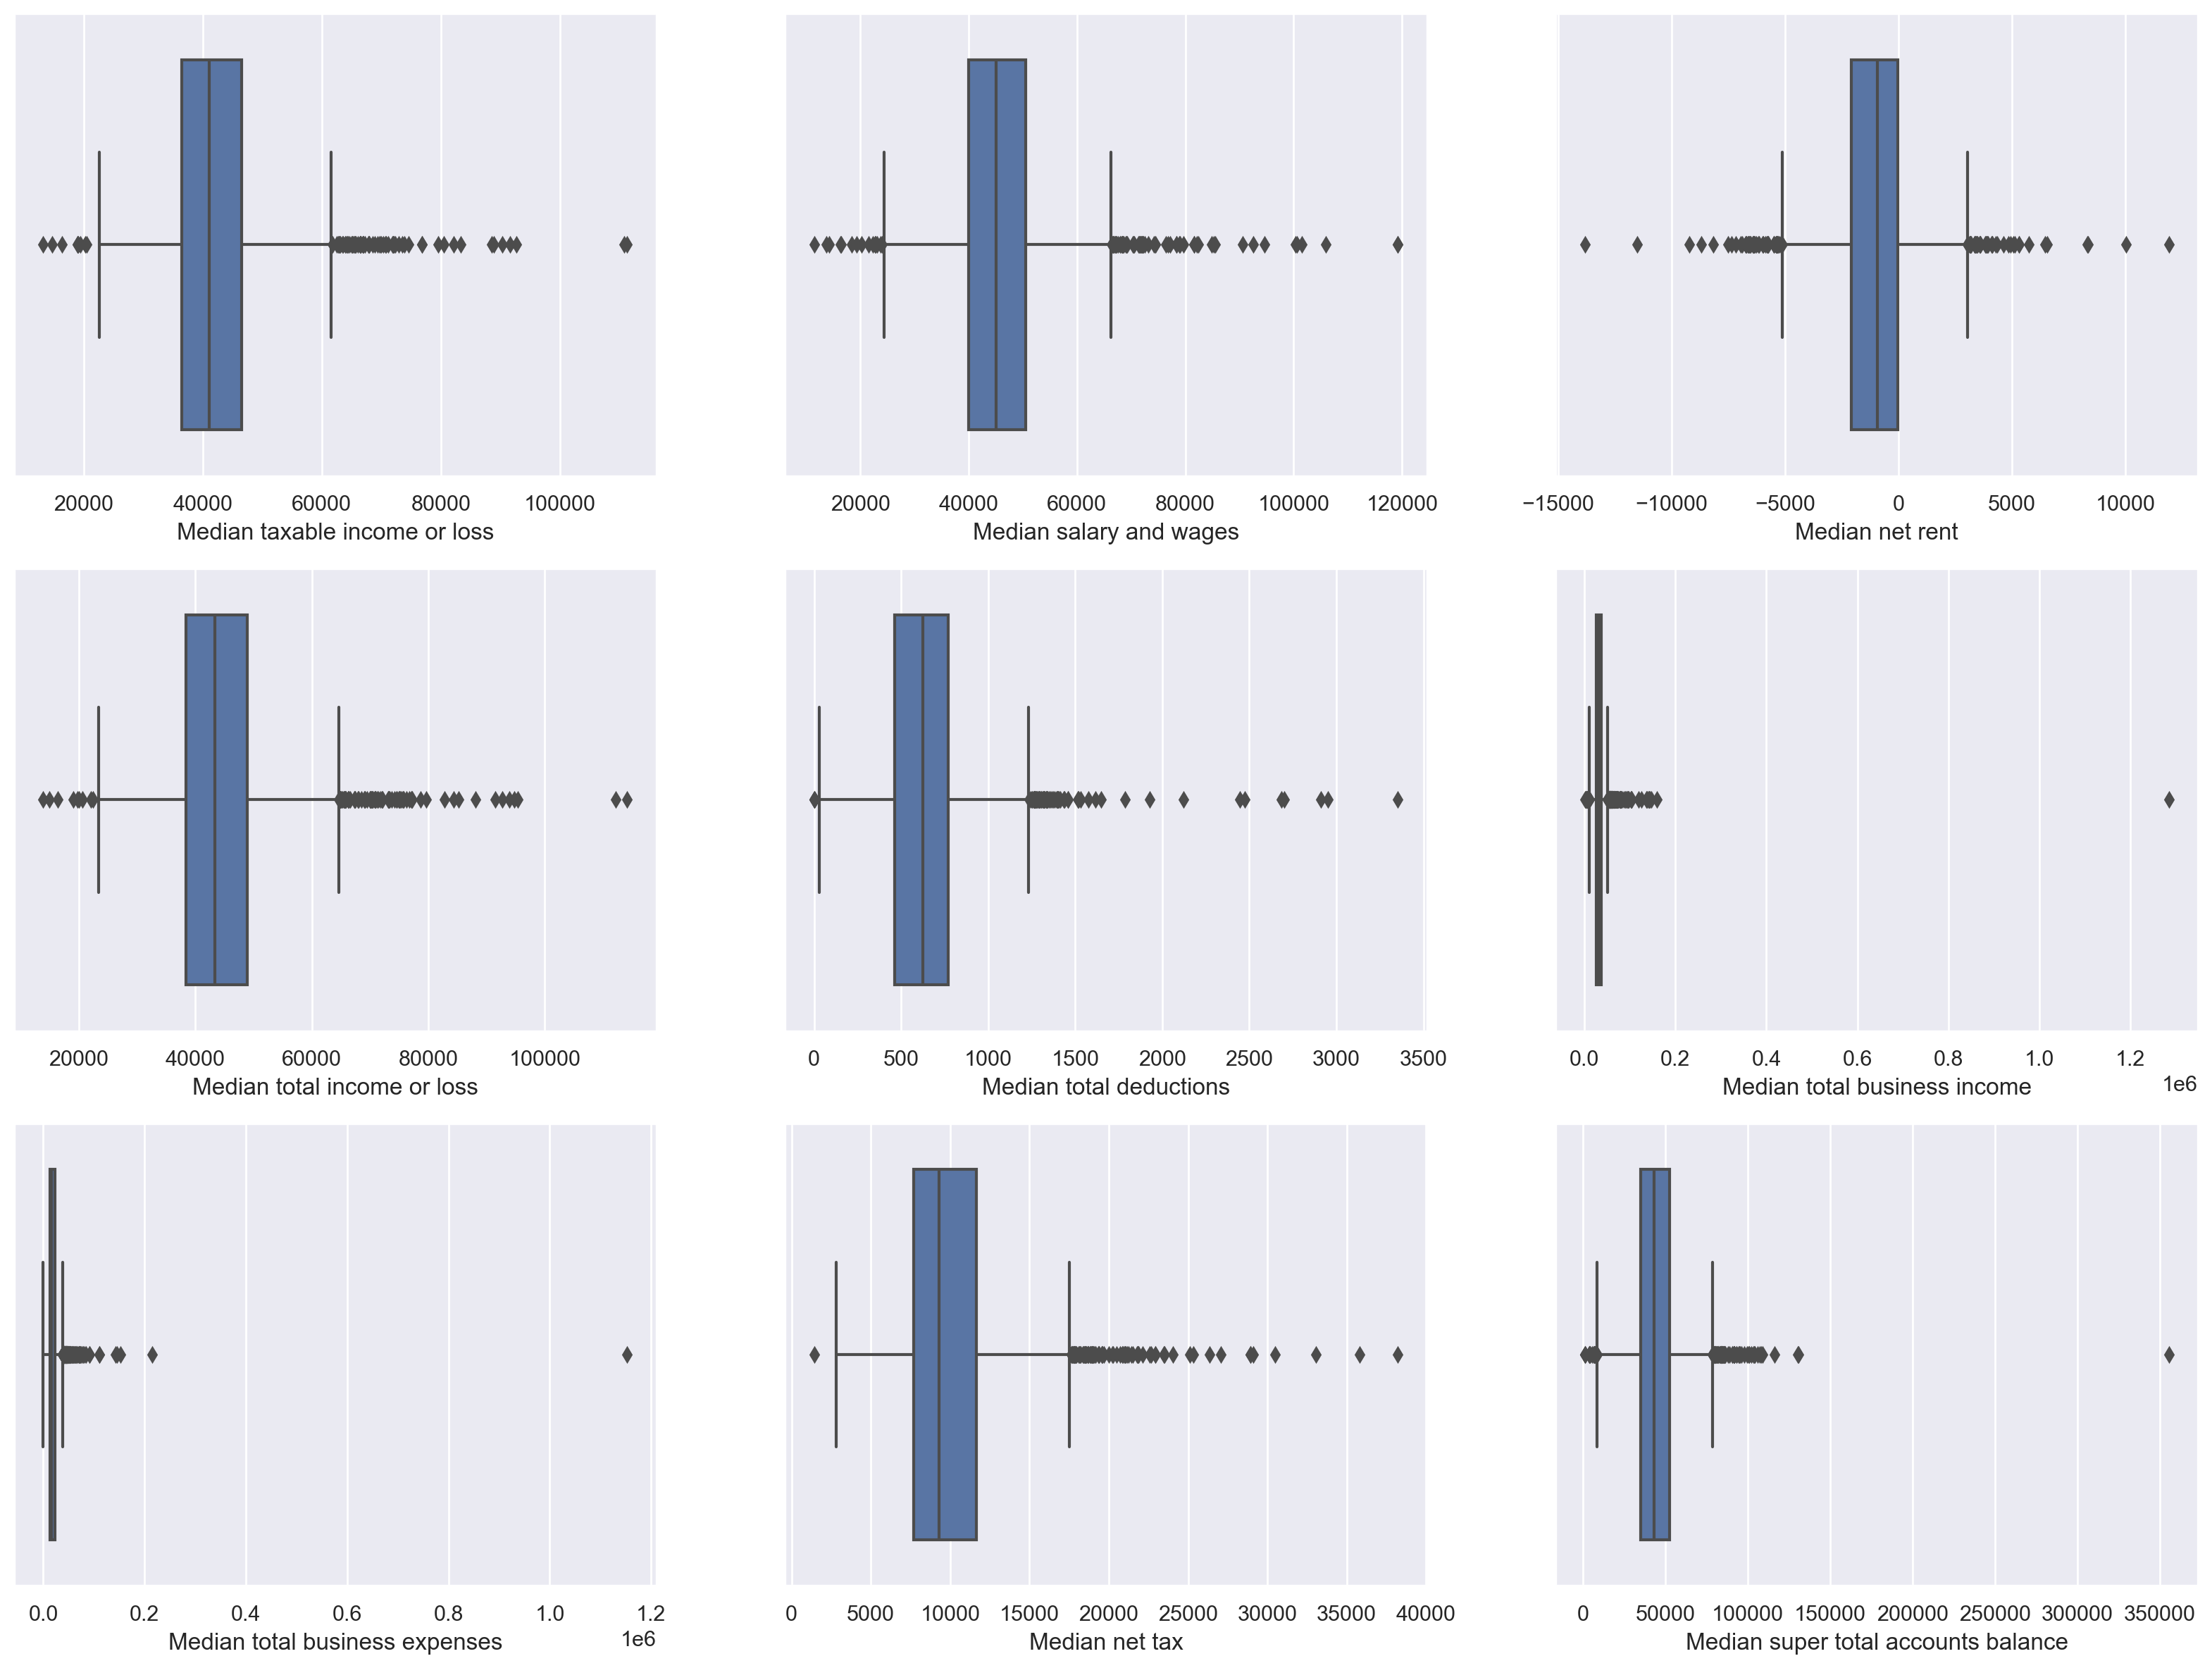

In [261]:
# checking for outliers using box-plots

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'Median taxable income or loss', data = ato)

plt.subplot(4,3,2)
sns.boxplot(x = 'Median salary and wages', data = ato)

plt.subplot(4,3,3)
sns.boxplot(x = 'Median net rent', data = ato)

plt.subplot(4,3,4)
sns.boxplot(x = 'Median total income or loss', data = ato)

plt.subplot(4,3,5)
sns.boxplot(x = 'Median total deductions', data = ato)

plt.subplot(4,3,6)
sns.boxplot(x = 'Median total business income', data = ato)

plt.subplot(4,3,7)
sns.boxplot(x = 'Median total business expenses', data = ato)

plt.subplot(4,3,8)
sns.boxplot(x = 'Median net tax', data = ato)

plt.subplot(4,3,9)
sns.boxplot(x = 'Median super total accounts balance', data = ato)

In [262]:
# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(ato[['Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))

[[1.82116988 2.1180561  0.34930413 ... 0.19025436 0.42463544 2.52325009]
 [1.26837654 2.51784695 2.8750941  ... 0.66978789 2.77909361 1.4420026 ]
 [1.2316902  1.35223875 0.33301303 ... 0.45331972 0.23193431 2.34565445]
 ...
 [0.03138376 0.13672759 1.58927284 ... 0.54076258 0.56681478 0.7715907 ]
 [3.13267235 3.94137387 2.91575492 ... 0.28207906 4.08171831 1.95084331]
 [1.33250687 1.17750475 2.06700545 ... 0.006812   0.98947647 0.01558562]]


*******************************************************************************


Below are the outlier points along with the respective column numbers in the second array


(array([  15,   15,   17,   17,   19,   19,   19,   19,   22,   31,   31,
         31,   31,   33,   33,   33,   33,   35,   35,   43,   43,   43,
         45,   45,   45,   46,   46,   46,   46,   47,   47,   47,   71,
         71,   71,   85,   90,  236,  236,  236,  236,  255,  271,  394,
        428,  428,  428,  428,  431,  431,  432,  432,  432,  433,  443,
        443,  

In [263]:
# Removing the outliers
ato_outliers_removed = ato[(z<3).all(axis=1)]

In [264]:
ato_outliers_removed.head()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219
1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776
2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267
3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029
4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841


In [265]:
print('Shape of dataframe before outlier removal: ' + str(ato.shape))
print("\n")
print('Shape of dataframe after outlier removal: ' + str(ato_outliers_removed.shape))

Shape of dataframe before outlier removal: (2470, 10)


Shape of dataframe after outlier removal: (2374, 10)


In [266]:
X = ato_outliers_removed.drop('Postcode',axis =1)  
y = ato_outliers_removed['Postcode']

In [267]:
X.shape

(2374, 9)

In [268]:
y.shape

(2374,)

# PCA

In [269]:
X.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,25828,26186,-420,26811,280,22080,14998,8571,1219
1,53192,69154,4148,54338,876,37440,37177,19577,19776
2,31049,33284,-1654,32450,300,18532,8214,9233,4267
3,40289,42505,-906,42123,392,18000,7579,10972,9029
4,52414,56378,-1393,54867,567,23795,10851,15451,19841


In [270]:
y.head()

0    2000
1    2006
2    2007
3    2008
4    2009
Name: Postcode, dtype: int64

In [271]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [272]:
scaler = StandardScaler()

In [273]:
X_scaled = scaler.fit_transform(X)

In [274]:
X_scaled[:5,:5]

array([[-2.09800189, -2.49898664,  0.39052495, -2.19729752, -1.53333326],
       [ 1.58802545,  3.10382787,  3.310452  ,  1.3698034 ,  1.04740017],
       [-1.39471477, -1.57344257, -0.39826445, -1.46656471, -1.44673147],
       [-0.15005417, -0.37106982,  0.07986722, -0.21308386, -1.04836322],
       [ 1.48322611,  1.43790071, -0.23142973,  1.43835415, -0.29059753]])

In [275]:
X.columns

Index(['Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance'],
      dtype='object')

In [276]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [277]:
X_scaled_df.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,-2.098002,-2.498987,0.390525,-2.197298,-1.533333,-0.987375,-0.425216,-0.419973,-2.874109
1,1.588025,3.103828,3.310452,1.369803,1.047400,0.472951,1.814918,3.408359,-1.628807
2,-1.394715,-1.573443,-0.398264,-1.466565,-1.446731,-1.324695,-1.110417,-0.189703,-2.669567
3,-0.150054,-0.371070,0.079867,-0.213084,-1.048363,-1.375274,-1.174553,0.415192,-2.350004
4,1.483226,1.437901,-0.231430,1.438354,-0.290598,-0.824325,-0.844073,1.973169,-1.624445


<AxesSubplot:>

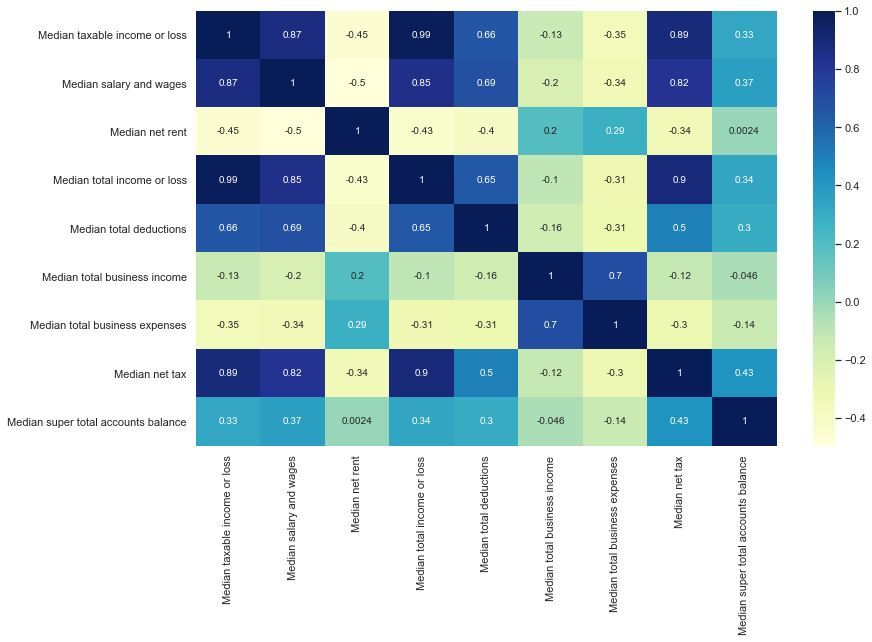

In [278]:
# Let's see the correlation matrix 
plt.figure(figsize = (13,8))       
sns.heatmap(X_scaled_df.corr(),annot = True, cmap="YlGnBu")

In [279]:
from sklearn.decomposition import PCA

In [280]:
pca = PCA(random_state=42)

In [281]:
pca.fit(X_scaled)

PCA(random_state=42)

In [282]:
pca.components_[0]

array([ 0.43411357,  0.42159385, -0.25055532,  0.42821103,  0.34294917,
       -0.13087654, -0.22327932,  0.40432449,  0.19896388])

In [283]:
pca.explained_variance_ratio_

array([0.53425901, 0.1708024 , 0.1103726 , 0.067597  , 0.05631028,
       0.03200999, 0.01753464, 0.01035463, 0.00075946])

In [284]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.53425901, 0.70506141, 0.815434  , 0.883031  , 0.93934128,
       0.97135127, 0.98888591, 0.99924054, 1.        ])

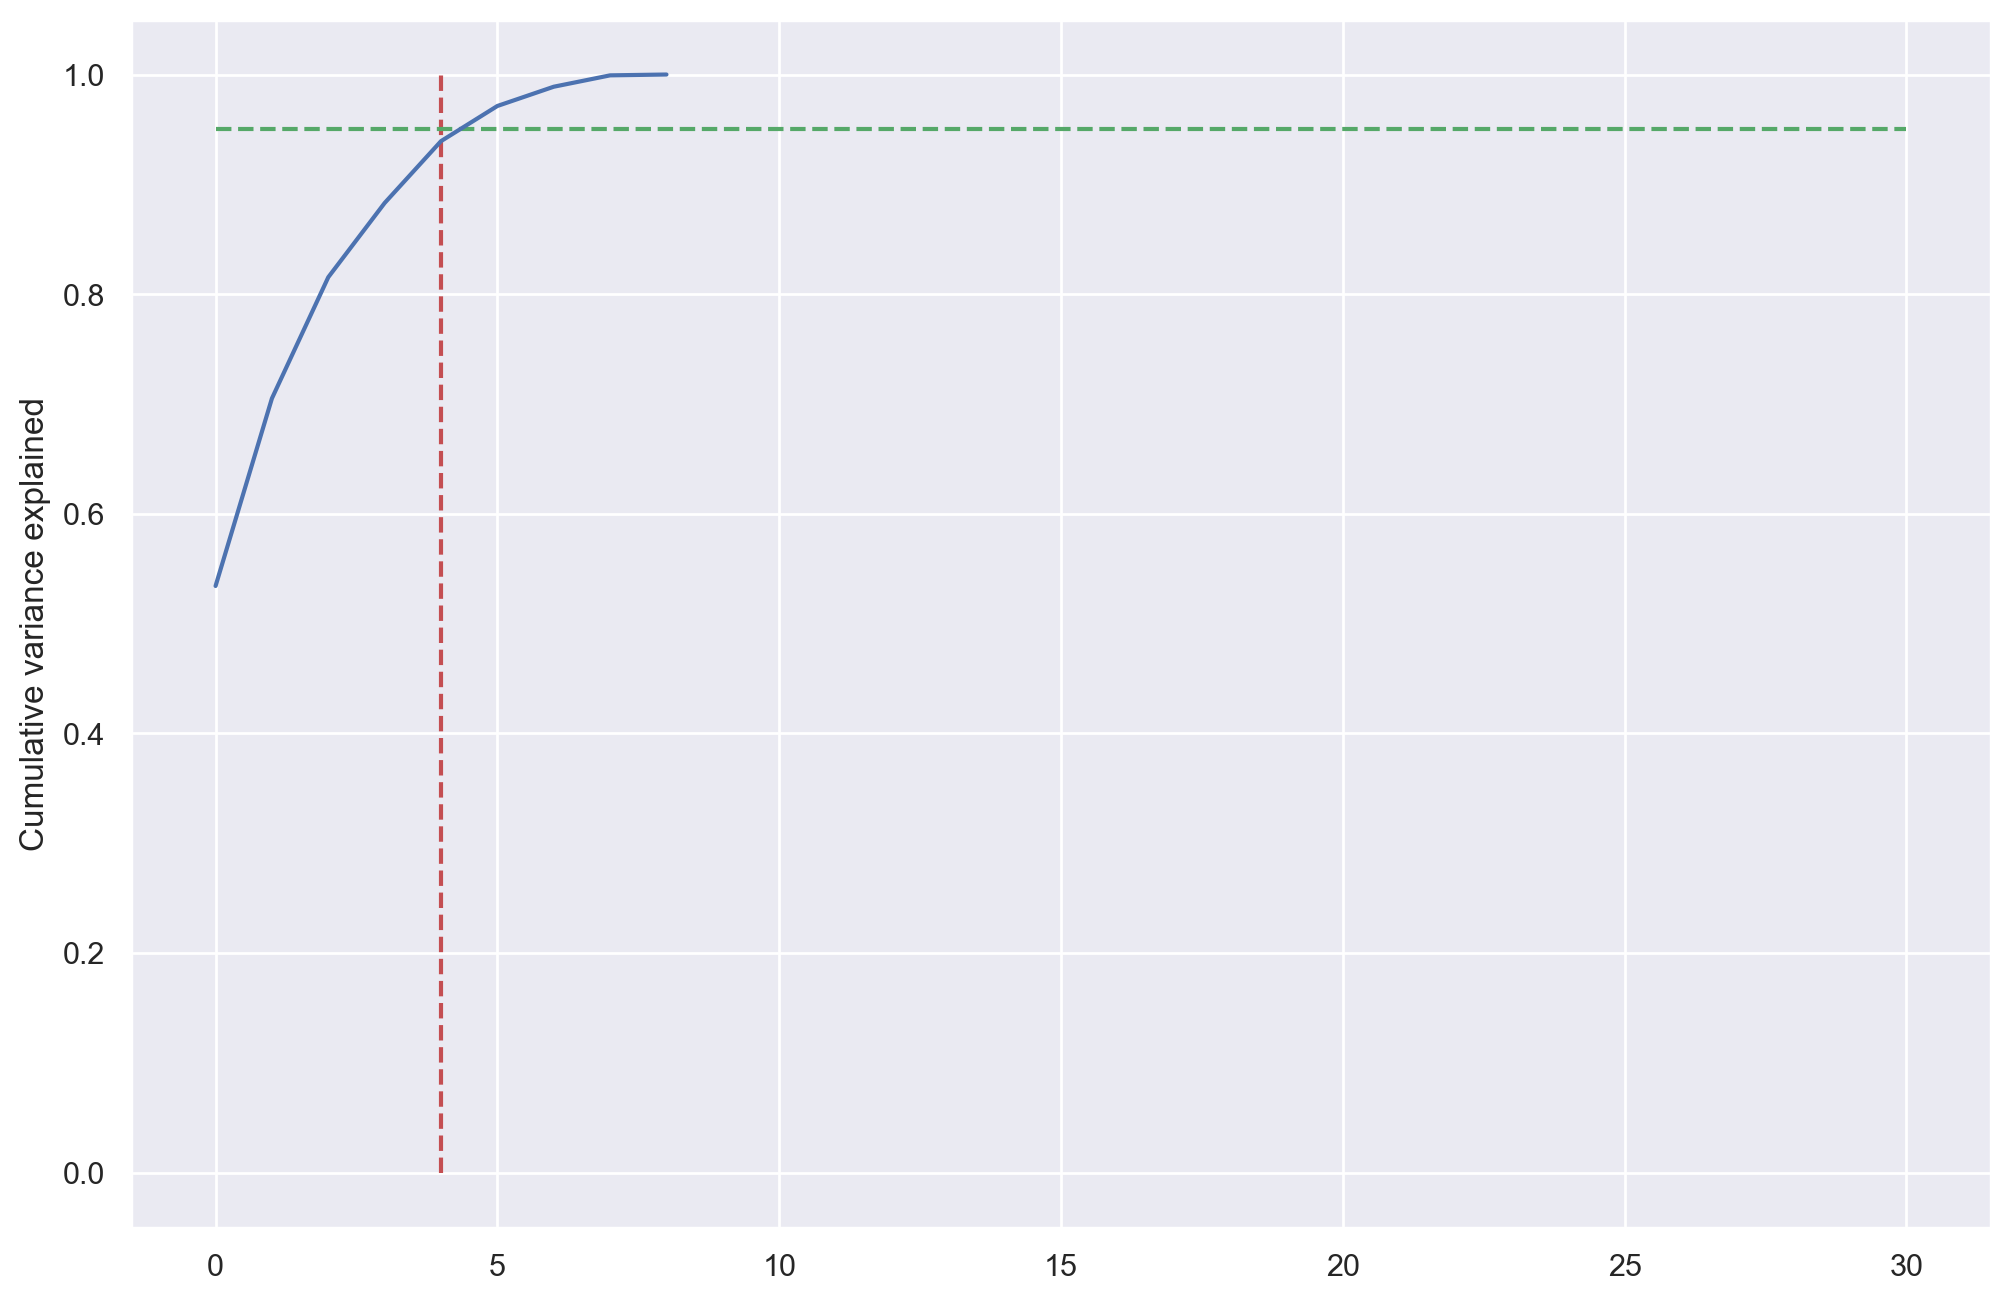

In [285]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [286]:
from sklearn.decomposition import IncrementalPCA

In [287]:
pca_final = IncrementalPCA(n_components=4)

In [288]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [289]:
print(X.shape)
print(X_pca_final.shape)

(2374, 9)
(2374, 4)


In [290]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [291]:
corrmat.shape

(4, 4)

<AxesSubplot:>

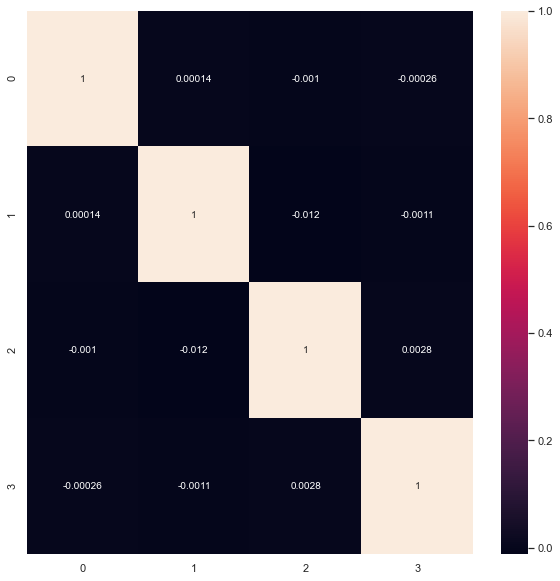

In [292]:
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

# Clustering

K-Means Clustering

In [293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [294]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

In [295]:
kmeans.labels_

array([3, 1, 3, ..., 3, 2, 1], dtype=int32)

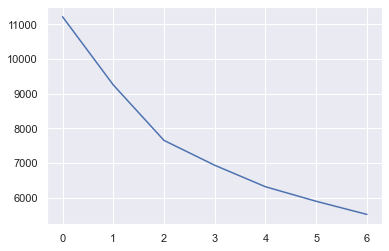

In [296]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [297]:
# from the elbow method we can say that k = 4 clusters seems to be a good choice

In [298]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.34779523714725996
For n_clusters=3, the silhouette score is 0.2757964049675628
For n_clusters=4, the silhouette score is 0.2619648111262978
For n_clusters=5, the silhouette score is 0.21333130254048555
For n_clusters=6, the silhouette score is 0.2187834155204362
For n_clusters=7, the silhouette score is 0.19860357279812532
For n_clusters=8, the silhouette score is 0.19862923057389173


In [299]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [300]:
kmeans.labels_

array([3, 0, 3, ..., 3, 2, 0], dtype=int32)

In [301]:
ato_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

<ipython-input-301-f20782d58b4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ato_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_


In [302]:
ato_outliers_removed.head()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,K-Means_Cluster_ID
0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219,3
1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776,0
2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267,3
3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029,3
4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841,0


<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='Median total income or loss'>

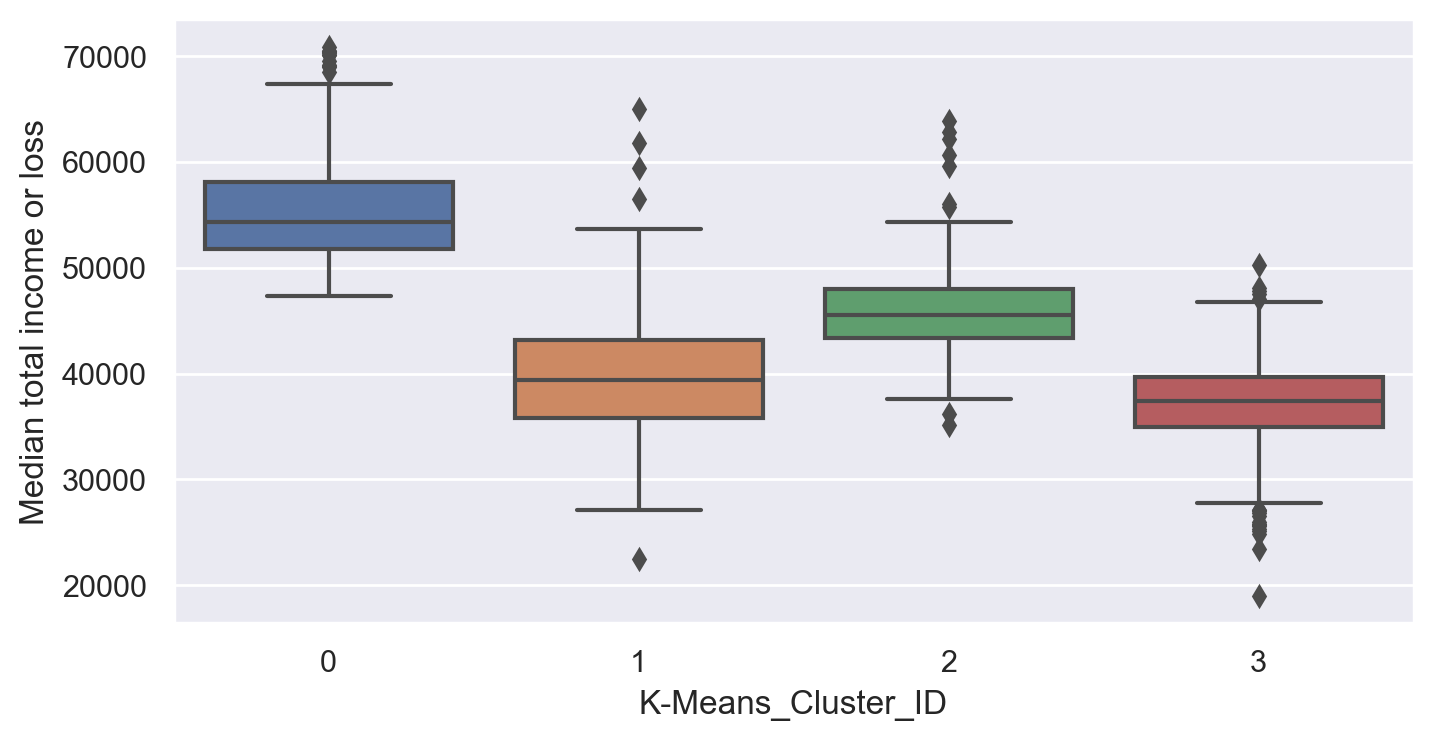

In [303]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total income or loss', data=ato_outliers_removed)

# Hierarchical Clustering

In [304]:
X_scaled_df.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,-2.098002,-2.498987,0.390525,-2.197298,-1.533333,-0.987375,-0.425216,-0.419973,-2.874109
1,1.588025,3.103828,3.310452,1.369803,1.047400,0.472951,1.814918,3.408359,-1.628807
2,-1.394715,-1.573443,-0.398264,-1.466565,-1.446731,-1.324695,-1.110417,-0.189703,-2.669567
3,-0.150054,-0.371070,0.079867,-0.213084,-1.048363,-1.375274,-1.174553,0.415192,-2.350004
4,1.483226,1.437901,-0.231430,1.438354,-0.290598,-0.824325,-0.844073,1.973169,-1.624445


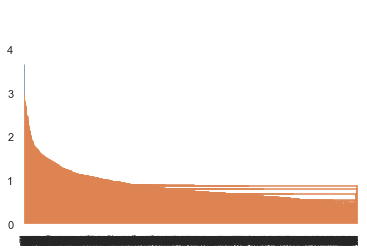

In [305]:
# single linkage
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

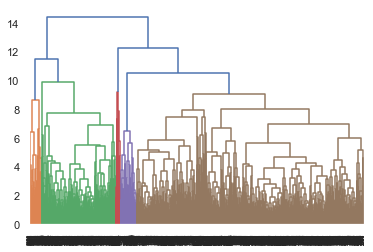

In [306]:
# complete linkage
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

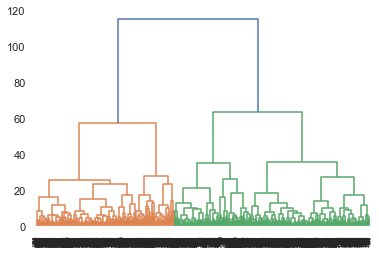

In [307]:
# Ward linkage
w_mergings = linkage(X_scaled_df, method="ward", metric='euclidean')
dendrogram(w_mergings)
plt.show()

In [308]:
# 4 clusters using single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [309]:
# the single linkage clustering does not perform well in generating the clusters hence we go for complete linkage

In [310]:
# 4 clusters using complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 1, 0, ..., 0, 1, 1])

In [311]:
# 4 clusters using ward
w_cluster_labels = cut_tree(w_mergings, n_clusters=4).reshape(-1, )
w_cluster_labels

array([0, 1, 0, ..., 0, 2, 1])

In [312]:
ato_outliers_removed["Hierarchical_Cluster_labels"] = w_cluster_labels

<ipython-input-312-6eb005c18722>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ato_outliers_removed["Hierarchical_Cluster_labels"] = w_cluster_labels


In [313]:
ato_outliers_removed.head()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219,3,0
1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776,0,1
2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267,3,0
3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029,3,0
4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841,0,2


<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='Median total income or loss'>

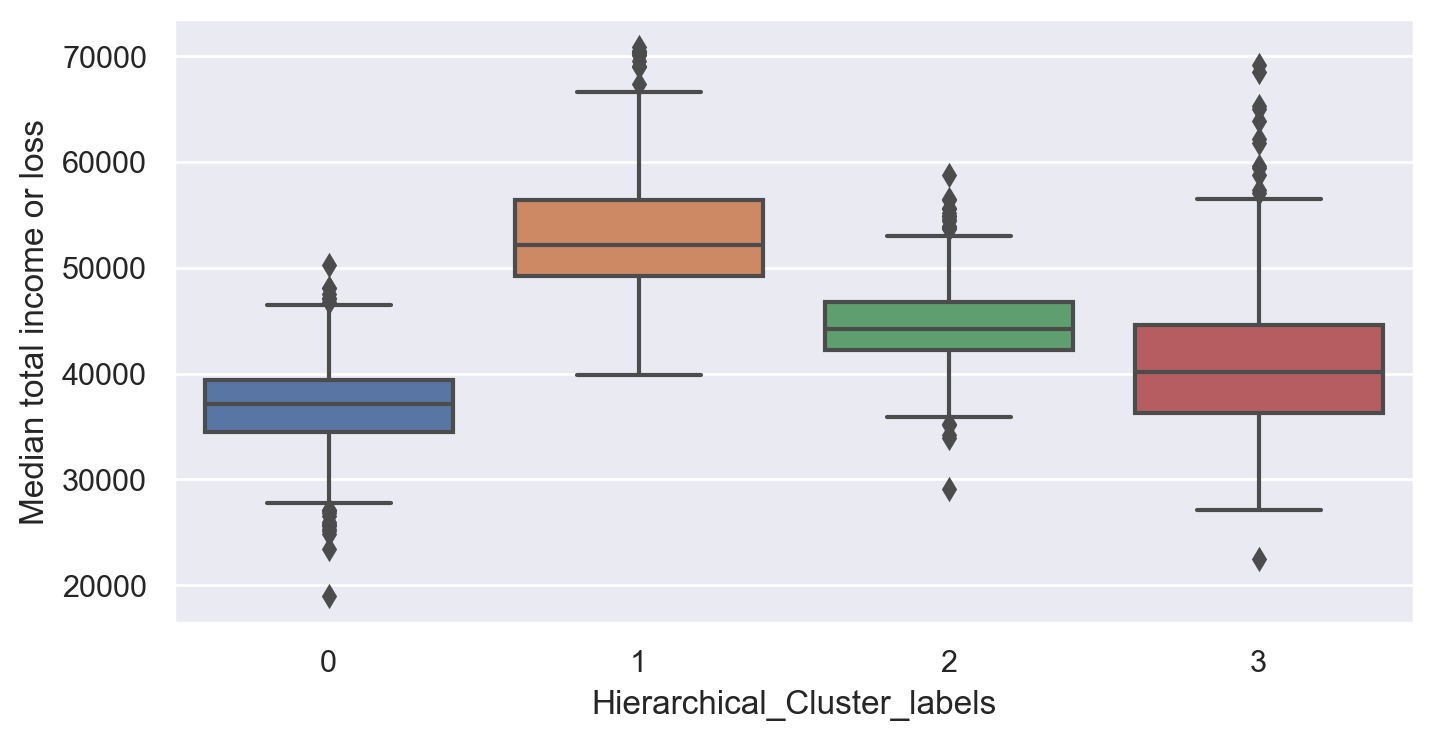

In [314]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total income or loss', data= ato_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='Median super total accounts balance'>

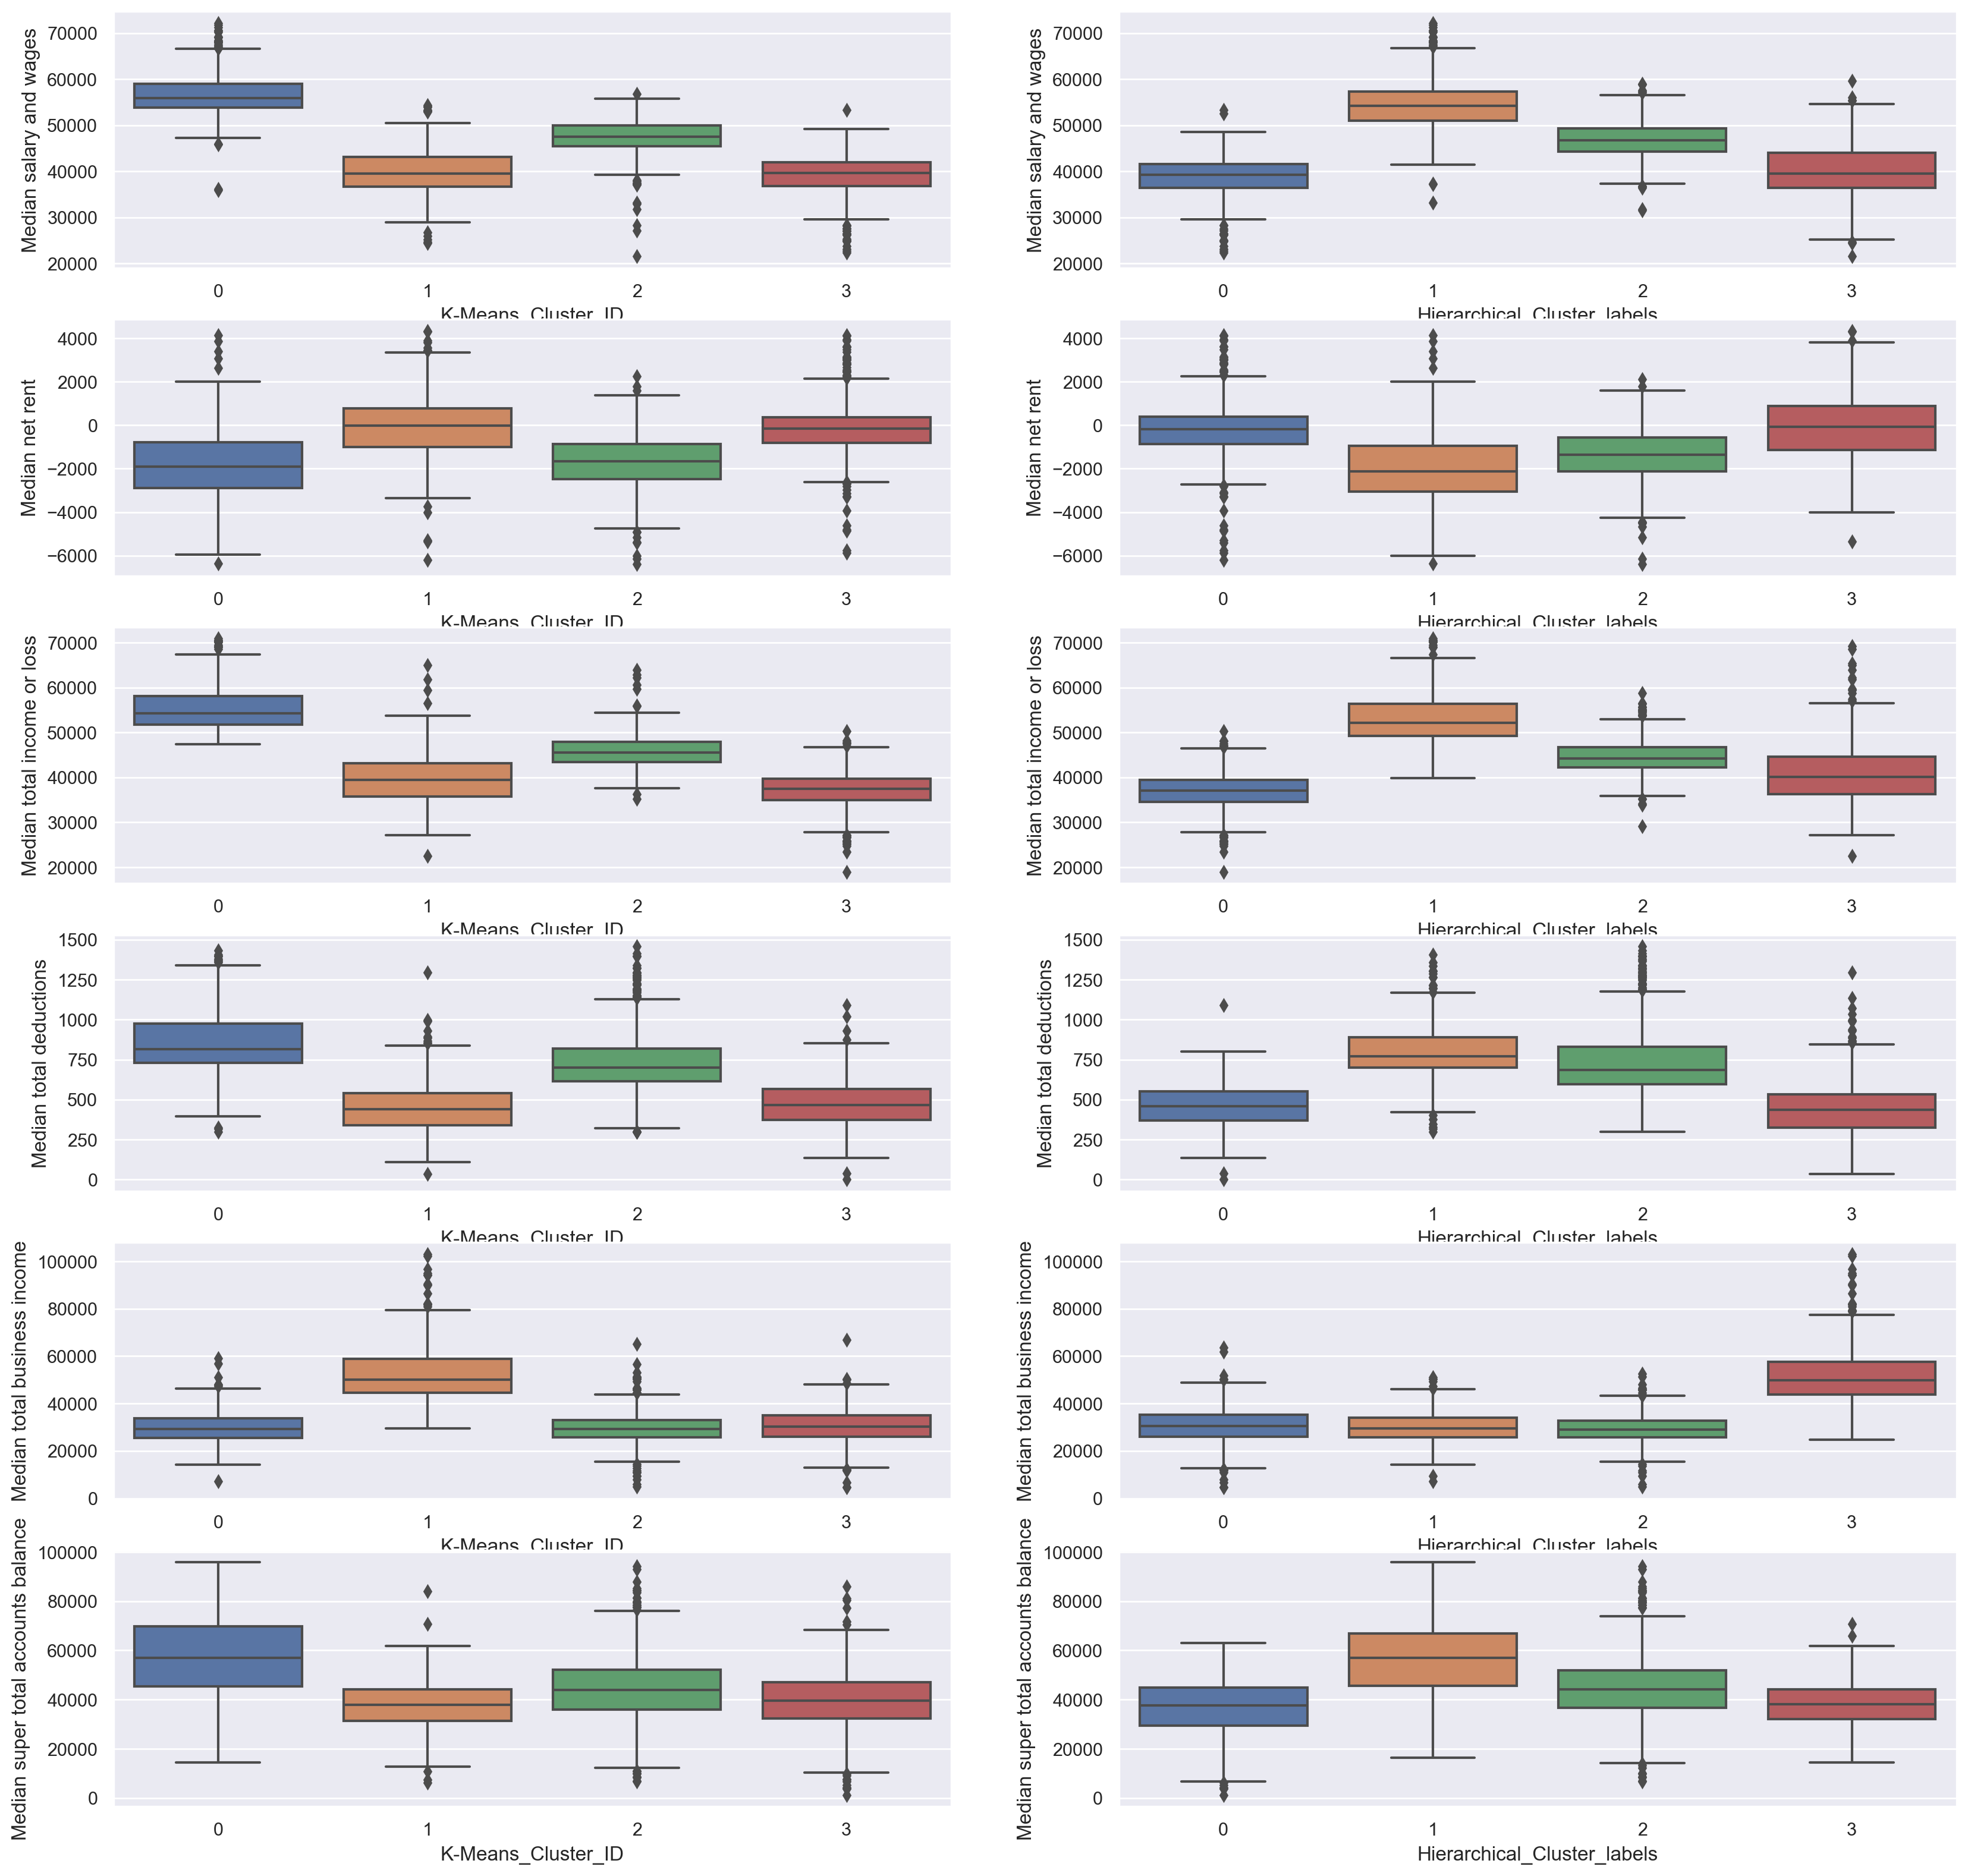

In [315]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,20), dpi=200)


plt.subplot(6,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='Median salary and wages', data=ato_outliers_removed)

plt.subplot(6,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median salary and wages', data=ato_outliers_removed)

plt.subplot(6,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='Median net rent', data=ato_outliers_removed)

plt.subplot(6,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median net rent', data=ato_outliers_removed)

plt.subplot(6,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total income or loss', data=ato_outliers_removed)

plt.subplot(6,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total income or loss', data=ato_outliers_removed)

plt.subplot(6,2,7)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total deductions', data=ato_outliers_removed)

plt.subplot(6,2,8)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total deductions', data=ato_outliers_removed)

plt.subplot(6,2,9)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total business income', data=ato_outliers_removed)

plt.subplot(6,2,10)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total business income', data=ato_outliers_removed)


plt.subplot(6,2,11)
sns.boxplot(x='K-Means_Cluster_ID', y='Median super total accounts balance', data=ato_outliers_removed)

plt.subplot(6,2,12)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median super total accounts balance', data=ato_outliers_removed)

In [316]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])

In [317]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4
0,-4.046946,-2.344803,-1.169799,1.234097
1,2.708439,3.045136,-0.186319,3.752366
2,-2.481807,-2.795075,-1.358239,1.234835
3,-0.550389,-2.147984,-1.084570,1.980605
4,2.593841,-0.591360,-1.087499,2.408755


In [318]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = w_cluster_labels

In [319]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,-4.046946,-2.344803,-1.169799,1.234097,3,0
1,2.708439,3.045136,-0.186319,3.752366,0,1
2,-2.481807,-2.795075,-1.358239,1.234835,3,0
3,-0.550389,-2.147984,-1.084570,1.980605,3,0
4,2.593841,-0.591360,-1.087499,2.408755,0,2


<AxesSubplot:xlabel='K_Means_Cluster_ID', ylabel='PC1'>

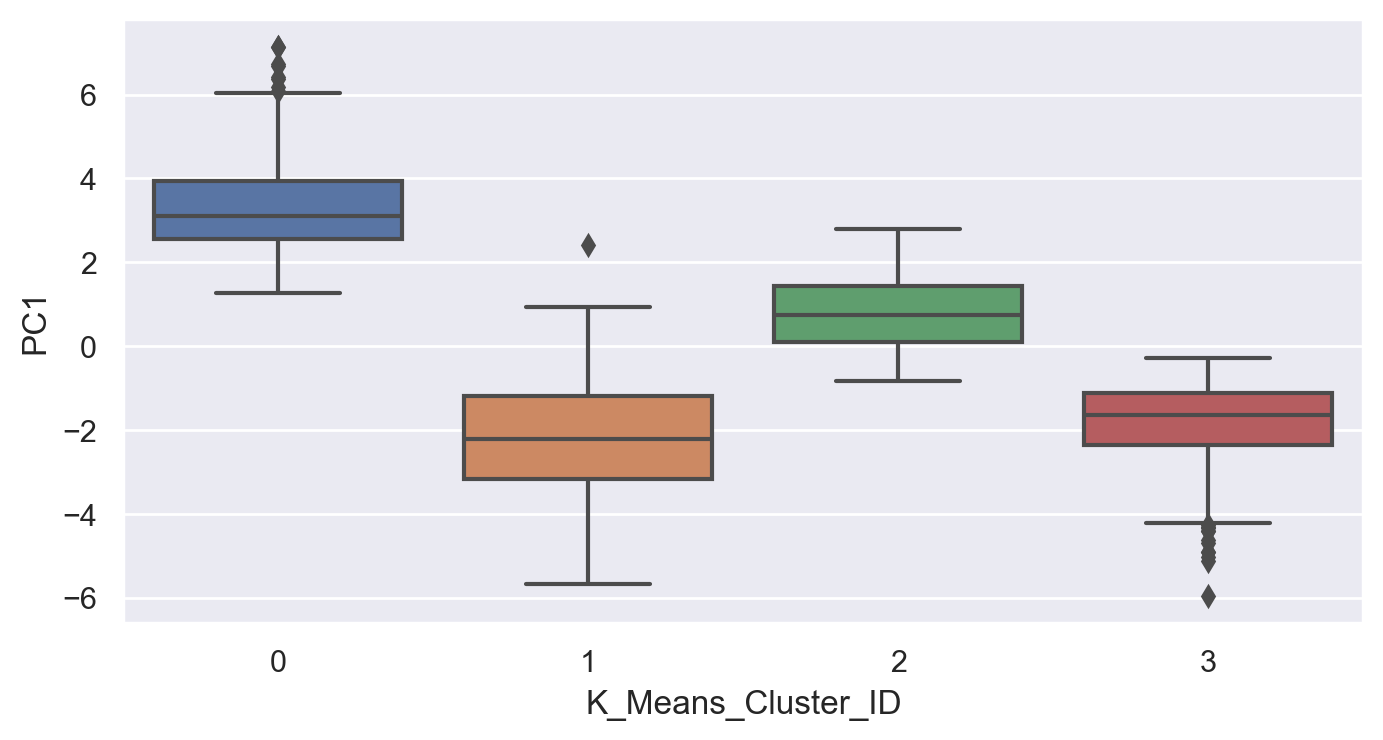

In [320]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K_Means_Cluster_ID', y='PC1', data= X_pca_final_df)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

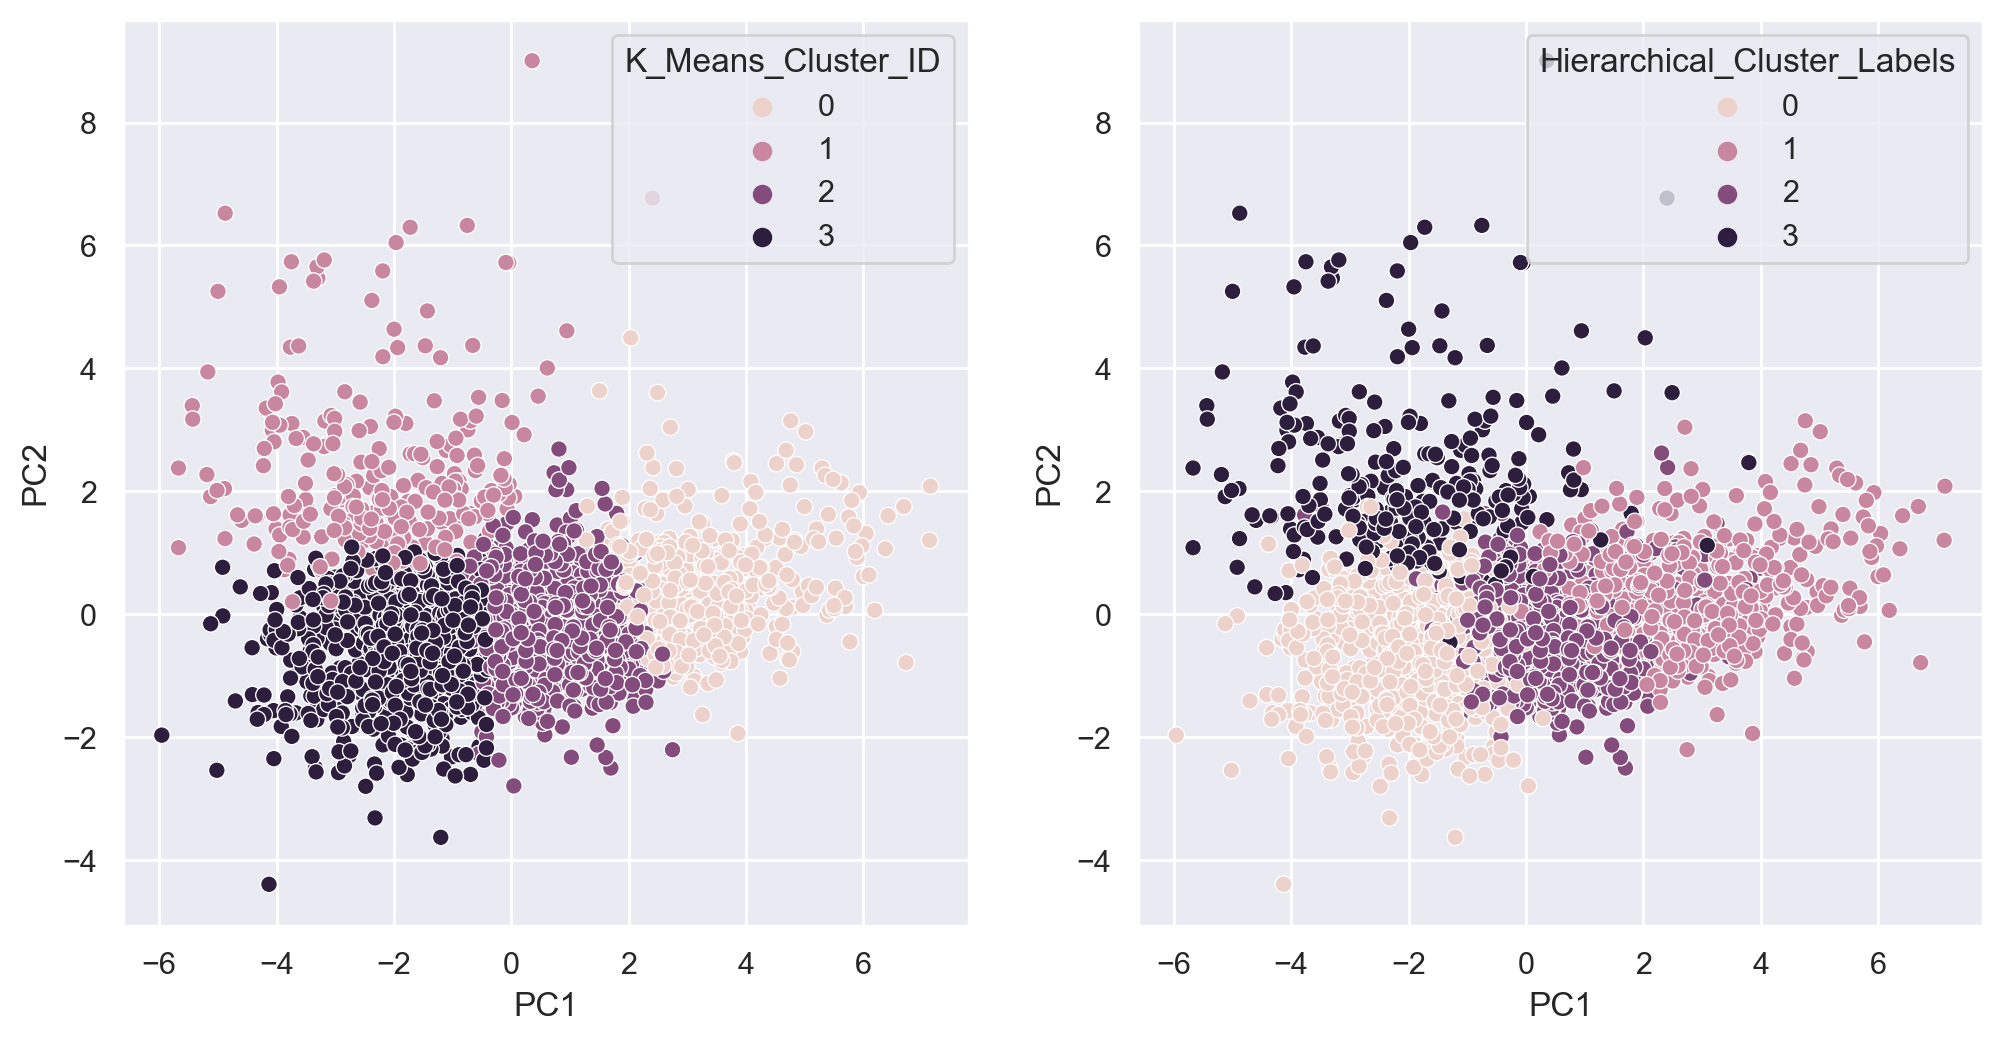

In [321]:
# scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')

In [322]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
Median taxable income or loss,0.434114,0.130804,0.062012,0.240999,-0.003151,0.064704,0.267486,-0.363341,-0.724395
Median salary and wages,0.421594,0.075378,0.051678,0.002188,0.031098,-0.262832,-0.830062,-0.227547,0.055432
Median net rent,-0.250555,0.149216,-0.601423,0.541805,0.493837,-0.037211,-0.103174,-0.061124,-0.007351
Median total income or loss,0.428211,0.161749,0.054046,0.255239,0.000828,0.048079,0.361355,-0.344789,0.686028
Median total deductions,0.342949,0.026529,0.069226,-0.427428,0.779952,0.005212,0.135590,0.259569,-0.009018
Median total business income,-0.130877,0.704422,0.163579,-0.066746,0.003027,0.642380,-0.204216,0.032290,0.006325
Median total business expenses,-0.223279,0.614249,0.150670,-0.108668,-0.015322,-0.710188,0.179494,-0.021493,-0.032455
Median net tax,0.404324,0.165941,-0.103436,0.340293,-0.250428,-0.072018,0.012327,0.783669,-0.017239
Median super total accounts balance,0.198964,0.164404,-0.750935,-0.518128,-0.289593,0.028356,0.075936,-0.102820,-0.004334


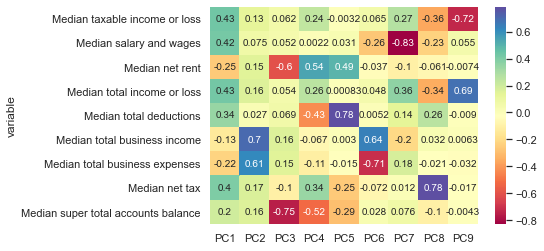

In [323]:
# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs. Except A and B, all other variables have 
# positive projection on first PC.

# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


# Finding similar postcodes: based on Income dataset

In [324]:
# update the index
ato_outliers_removed.set_index('Postcode', inplace=True)


# normalize the data into a new dataframe
from sklearn.preprocessing import MinMaxScaler
z = ato_outliers_removed.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(z)

df_normal = pd.DataFrame(feature_mtx, index=ato_outliers_removed.index, columns=ato_outliers_removed.columns)
df_normal

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,K-Means_Cluster_ID,Hierarchical_Cluster_labels
Postcode,,,,,,,,,,,
2000,0.139968,0.091930,0.556260,0.150647,0.192044,0.177218,0.165342,0.317762,0.000000,1.000000,0.000000
2006,0.700740,0.940312,0.982101,0.681411,0.600823,0.333310,0.409849,0.973545,0.195827,0.000000,0.333333
2007,0.246962,0.232077,0.441223,0.259376,0.205761,0.141163,0.090553,0.357207,0.032165,1.000000,0.000000
2008,0.436318,0.414141,0.510954,0.445886,0.268861,0.135757,0.083553,0.460823,0.082417,1.000000,0.000000
2009,0.684796,0.688057,0.465554,0.691611,0.388889,0.194647,0.119624,0.727701,0.196513,0.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
862,0.367994,0.358442,0.562040,0.404315,0.394376,0.935704,0.544720,0.140738,0.197980,0.333333,1.000000
870,0.677870,0.652635,0.347907,0.682606,0.699588,0.187147,0.127551,0.485670,0.413584,0.000000,0.333333
872,0.285796,0.198393,0.370653,0.289011,0.329218,0.083828,0.085129,0.133409,0.122275,1.000000,0.000000


In [325]:
# The following function takes in a postcode and returns the top 10 similar postcodes based on income dataset

def postrec(postcode):
    
    try:
        #choose a postcode for comparison
        new_postcode = postcode
        new_postcode_df = list(df_normal.loc[new_postcode])

        #get the absolute difference between the new postcode and all other postcode
        temp_df = df_normal-new_postcode_df
        temp_df = temp_df.abs()
        recommendations = temp_df.sum(axis=1).sort_values().head(10)

        return recommendations

    except:
        print("Error: Postcode not found")

In [326]:
#Top 10 Postcodes similar to 2000
postcode = 2000
results = postrec(postcode)
results

Postcode
2000    0.000000
3000    0.473295
2007    0.667077
4468    0.670654
4375    0.703346
6253    0.706238
4381    0.708218
4388    0.721319
5303    0.778173
4402    0.780638
dtype: float64

In [327]:
#Top 10 Postcodes similar to 7000
postcode = 7000
results = postrec(postcode)
results

Postcode
7000    0.000000
7050    0.269778
7004    0.270987
4122    0.274954
2754    0.290833
5070    0.293294
3189    0.297715
7008    0.307219
3034    0.320075
2211    0.321201
dtype: float64